# EDA PARA TRABAJO FINAL DE REGRESIÓN
## DATASET: https://kaggle.com/datasets/arnabchaki/data-science-salaries-2025

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arnabchaki/data-science-salaries-2025")

print("Path to dataset files:", path)

100%|██████████| 697k/697k [00:00<00:00, 54.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/arnabchaki/data-science-salaries-2025/versions/1


In [ ]:
import os
print(os.listdir(path))

['salaries.csv']


In [ ]:
PATH_CSV = path + '/salaries.csv'

In [ ]:
df = pd.read_csv(PATH_CSV)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EN,FT,Data Analist,65664,EUR,69120,NL,0,NL,M
1,2025,EN,FT,Data Analist,47652,EUR,50160,NL,0,NL,M
2,2025,EN,FT,Data Engineer,158113,USD,158113,US,0,US,M
3,2025,EN,FT,Data Engineer,87795,USD,87795,US,0,US,M
4,2025,EX,FT,Data Engineer,351410,USD,351410,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
105429,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
105430,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
105431,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
105432,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


# EDA

In [ ]:
df.dtypes

,0
work_year,int64
experience_level,object
employment_type,object
job_title,object
salary,int64
salary_currency,object
salary_in_usd,int64
employee_residence,object
remote_ratio,int64
company_location,object


In [ ]:
df.dtypes.value_counts()

,count
object,7
int64,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105434 entries, 0 to 105433
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           105434 non-null  int64 
 1   experience_level    105434 non-null  object
 2   employment_type     105434 non-null  object
 3   job_title           105434 non-null  object
 4   salary              105434 non-null  int64 
 5   salary_currency     105434 non-null  object
 6   salary_in_usd       105434 non-null  int64 
 7   employee_residence  105434 non-null  object
 8   remote_ratio        105434 non-null  int64 
 9   company_location    105434 non-null  object
 10  company_size        105434 non-null  object
dtypes: int64(4), object(7)
memory usage: 8.8+ MB


# TRATAMIENTO DE NULOS

In [ ]:
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [ ]:
df.shape

(105434, 11)

In [ ]:
df_cleaned = df.dropna()
df_cleaned.shape

(105434, 11)

In [ ]:
# Separar datos de test (si hay nulos en la variable objetivo)
df_salaries_test = df[df['salary_in_usd'].isnull()]
df_salaries_test.shape

(0, 11)

In [ ]:
if len(df_salaries_test) > 0:
    df_salaries_test.to_csv('salaries_test.csv', index=None)

In [ ]:
# Eliminar columnas no necesarias para el análisis
# salary y salary_currency son redundantes porque tenemos salary_in_usd
df_cleaned = df_cleaned.drop(columns=['salary', 'salary_currency'])
df_cleaned

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EN,FT,Data Analist,69120,NL,0,NL,M
1,2025,EN,FT,Data Analist,50160,NL,0,NL,M
2,2025,EN,FT,Data Engineer,158113,US,0,US,M
3,2025,EN,FT,Data Engineer,87795,US,0,US,M
4,2025,EX,FT,Data Engineer,351410,US,0,US,M
...,...,...,...,...,...,...,...,...,...
105429,2020,SE,FT,Data Scientist,412000,US,100,US,L
105430,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
105431,2020,EN,FT,Data Scientist,105000,US,100,US,S
105432,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


In [ ]:
df_cleaned.dtypes

,0
work_year,int64
experience_level,object
employment_type,object
job_title,object
salary_in_usd,int64
employee_residence,object
remote_ratio,int64
company_location,object
company_size,object


In [ ]:
df_cleaned.describe()

,work_year,salary_in_usd,remote_ratio
count,105434.000000,105434.000000,105434.000000
mean,2024.188981,158018.514179,21.103249
std,0.669665,74401.714026,40.714744
min,2020.000000,15000.000000,0.000000
25%,2024.000000,106400.000000,0.000000
50%,2024.000000,147000.000000,0.000000
75%,2025.000000,199000.000000,0.000000
max,2025.000000,800000.000000,100.000000


# ANÁLISIS DE VARIABLES

In [ ]:
# Análisis de la variable objetivo: salary_in_usd
variable = 'salary_in_usd'
data = df_cleaned[variable]

In [ ]:
mean_val = data.mean()
median_val = data.median()
mode_val = data.mode()[0]

print(f"📊 Medidas de tendencia central de {variable}")
print(f"Media (μ): {mean_val:.2f}")
print(f"Mediana: {median_val:.2f}")
print(f"Moda: {mode_val:.2f}")

📊 Medidas de tendencia central de salary_in_usd
Media (μ): 158018.51
Mediana: 147000.00
Moda: 160000.00


In [ ]:
variance_val = data.var()
std_val = data.std()
range_val = data.max() - data.min()
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
print(f"\n📈 Medidas de dispersión de {variable}")
print(f"Varianza (σ²): {variance_val:.2f}")
print(f"Desviación estándar (σ): {std_val:.2f}")
print(f"Rango: {range_val:.2f}")
print(f"Rango intercuartílico (IQR): {iqr:.2f}")


📈 Medidas de dispersión de salary_in_usd
Varianza (σ²): 5535615050.08
Desviación estándar (σ): 74401.71
Rango: 785000.00
Rango intercuartílico (IQR): 92600.00


# Identificación de outliers con la regla del IQR

In [ ]:
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

outliers = data[(data < limite_inferior) | (data > limite_superior)]

print(f"\n⚠️ Detección de Outliers (Regla del IQR) para {variable}")
print(f"Límite inferior: {limite_inferior:.2f}")
print(f"Límite superior: {limite_superior:.2f}")
print(f"Número de outliers detectados: {len(outliers)}")


⚠️ Detección de Outliers (Regla del IQR) para salary_in_usd
Límite inferior: -32500.00
Límite superior: 337900.00
Número de outliers detectados: 2221


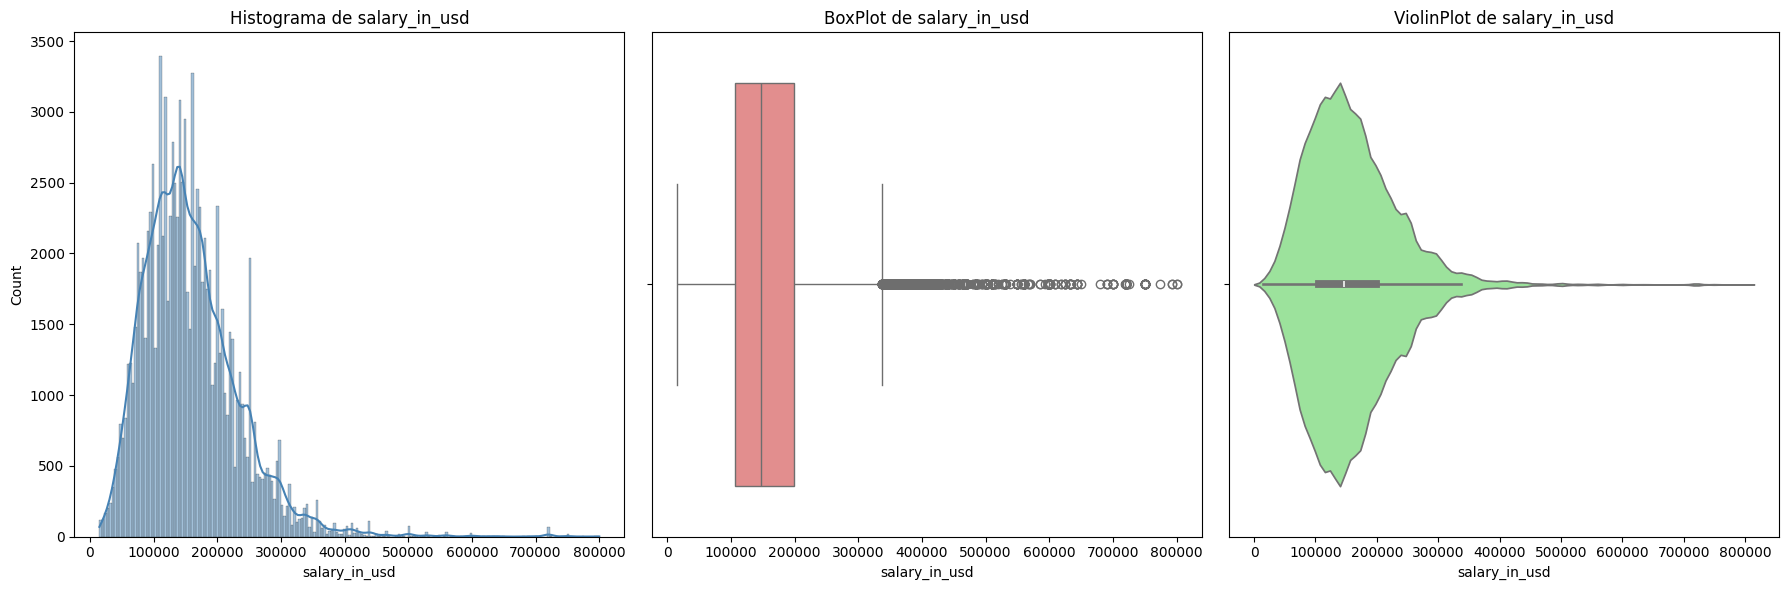

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histograma
sns.histplot(data, kde=True, color='steelblue', ax=axes[0])
axes[0].set_title(f'Histograma de {variable}')

# BoxPlot
sns.boxplot(x=data, color='lightcoral', ax=axes[1])
axes[1].set_title(f'BoxPlot de {variable}')

# ViolinPlot
sns.violinplot(x=data, color='lightgreen', ax=axes[2])
axes[2].set_title(f'ViolinPlot de {variable}')

plt.tight_layout()
plt.show()

# ELIMINAR OUTLIERS

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [ ]:
df_cleaned = remove_outliers(df_cleaned, variable)
data = df_cleaned[variable]

In [ ]:
# Verificar que se eliminaron los outliers
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

outliers = data[(data < limite_inferior) | (data > limite_superior)]

print(f"\n⚠️ Detección de Outliers (Regla del IQR) para {variable}")
print(f"Límite inferior: {limite_inferior:.2f}")
print(f"Límite superior: {limite_superior:.2f}")
print(f"Número de outliers detectados: {len(outliers)}")


⚠️ Detección de Outliers (Regla del IQR) para salary_in_usd
Límite inferior: -26825.00
Límite superior: 324895.00
Número de outliers detectados: 468


In [ ]:
df_cleaned

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EN,FT,Data Analist,69120,NL,0,NL,M
1,2025,EN,FT,Data Analist,50160,NL,0,NL,M
2,2025,EN,FT,Data Engineer,158113,US,0,US,M
3,2025,EN,FT,Data Engineer,87795,US,0,US,M
5,2025,EX,FT,Data Engineer,195230,US,0,US,M
...,...,...,...,...,...,...,...,...,...
105428,2021,SE,FT,Data Specialist,165000,US,100,US,L
105430,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
105431,2020,EN,FT,Data Scientist,105000,US,100,US,S
105432,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


In [ ]:
df_cleaned.shape

(103213, 9)

# ANÁLISIS DE VARIABLES CATEGÓRICAS

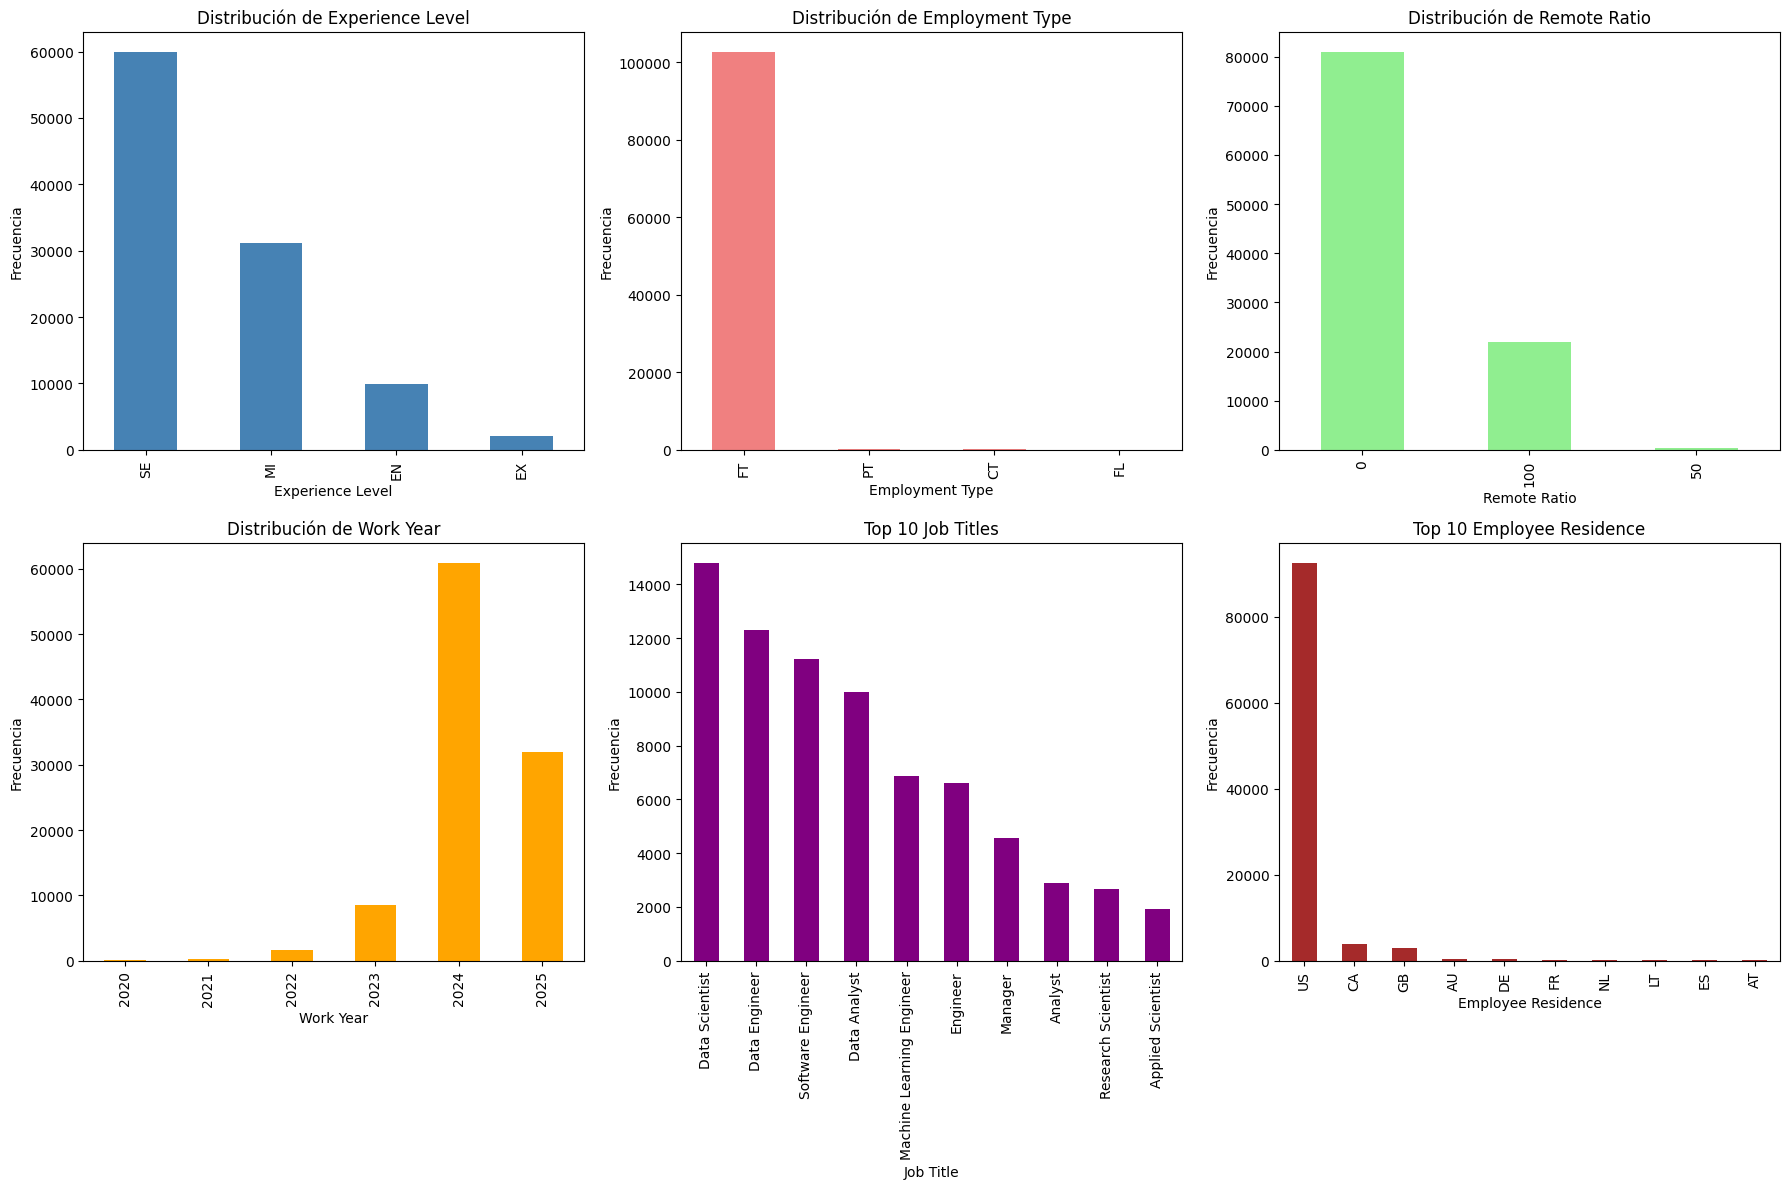

In [ ]:
# Visualización de variables categóricas
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# experience_level
df_cleaned['experience_level'].value_counts().plot(kind='bar', ax=axes[0, 0], color='steelblue')
axes[0, 0].set_title('Distribución de Experience Level')
axes[0, 0].set_xlabel('Experience Level')
axes[0, 0].set_ylabel('Frecuencia')

# employment_type
df_cleaned['employment_type'].value_counts().plot(kind='bar', ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Distribución de Employment Type')
axes[0, 1].set_xlabel('Employment Type')
axes[0, 1].set_ylabel('Frecuencia')

# remote_ratio
df_cleaned['remote_ratio'].value_counts().plot(kind='bar', ax=axes[0, 2], color='lightgreen')
axes[0, 2].set_title('Distribución de Remote Ratio')
axes[0, 2].set_xlabel('Remote Ratio')
axes[0, 2].set_ylabel('Frecuencia')

# work_year
df_cleaned['work_year'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Distribución de Work Year')
axes[1, 0].set_xlabel('Work Year')
axes[1, 0].set_ylabel('Frecuencia')

# Top 10 job_title
df_cleaned['job_title'].value_counts().head(10).plot(kind='bar', ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Top 10 Job Titles')
axes[1, 1].set_xlabel('Job Title')
axes[1, 1].set_ylabel('Frecuencia')

# Top 10 employee_residence
df_cleaned['employee_residence'].value_counts().head(10).plot(kind='bar', ax=axes[1, 2], color='brown')
axes[1, 2].set_title('Top 10 Employee Residence')
axes[1, 2].set_xlabel('Employee Residence')
axes[1, 2].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# ENCODING DE VARIABLES CATEGÓRICAS

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Crear copia para encoding
df_encoded = df_cleaned.copy()

# Columnas categóricas para encoding
categorical_cols = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']

# Aplicar Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le
    print(f"Encoded {col}: {len(le.classes_)} categorías únicas")

df_encoded.head()

Encoded experience_level: 4 categorías únicas
Encoded employment_type: 4 categorías únicas
Encoded job_title: 344 categorías únicas
Encoded employee_residence: 98 categorías únicas
Encoded company_location: 92 categorías únicas
Encoded company_size: 3 categorías únicas


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,0,2,95,69120,64,0,62,1
1,2025,0,2,95,50160,64,0,62,1
2,2025,0,2,114,158113,91,0,86,1
3,2025,0,2,114,87795,91,0,86,1
5,2025,1,2,114,195230,91,0,86,1


In [ ]:
df_encoded.dtypes

,0
work_year,int64
experience_level,int64
employment_type,int64
job_title,int64
salary_in_usd,int64
employee_residence,int64
remote_ratio,int64
company_location,int64
company_size,int64


In [ ]:
df_encoded.describe()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location
count,103213.000000,103213.000000,103213.000000,103213.000000,103213.000000,103213.000000,103213.000000,103213.000000
mean,2024.185887,2.368713,1.997452,176.063325,152547.460727,84.500024,21.356321,79.952215
std,0.671240,0.921471,0.114720,91.733723,63681.014279,20.202158,40.892154,18.915739
min,2020.000000,0.000000,0.000000,0.000000,15000.000000,0.000000,0.000000,0.000000
25%,2024.000000,2.000000,2.000000,109.000000,105070.000000,91.000000,0.000000,86.000000
50%,2024.000000,3.000000,2.000000,162.000000,145000.000000,91.000000,0.000000,86.000000
75%,2025.000000,3.000000,2.000000,247.000000,193000.000000,91.000000,0.000000,86.000000
max,2025.000000,3.000000,3.000000,343.000000,337500.000000,97.000000,100.000000,91.000000


# GUARDAR DATASET LIMPIO

In [ ]:
# Guardar dataset sin encoding (variables categóricas originales)
df_cleaned.to_csv('salaries_clean.csv', index=None)
print("Guardado: salaries_clean.csv")

Guardado: salaries_clean.csv


In [ ]:
# Guardar dataset con encoding
df_encoded.to_csv('salaries_encoded.csv', index=None)
print("Guardado: salaries_encoded.csv")

Guardado: salaries_encoded.csv


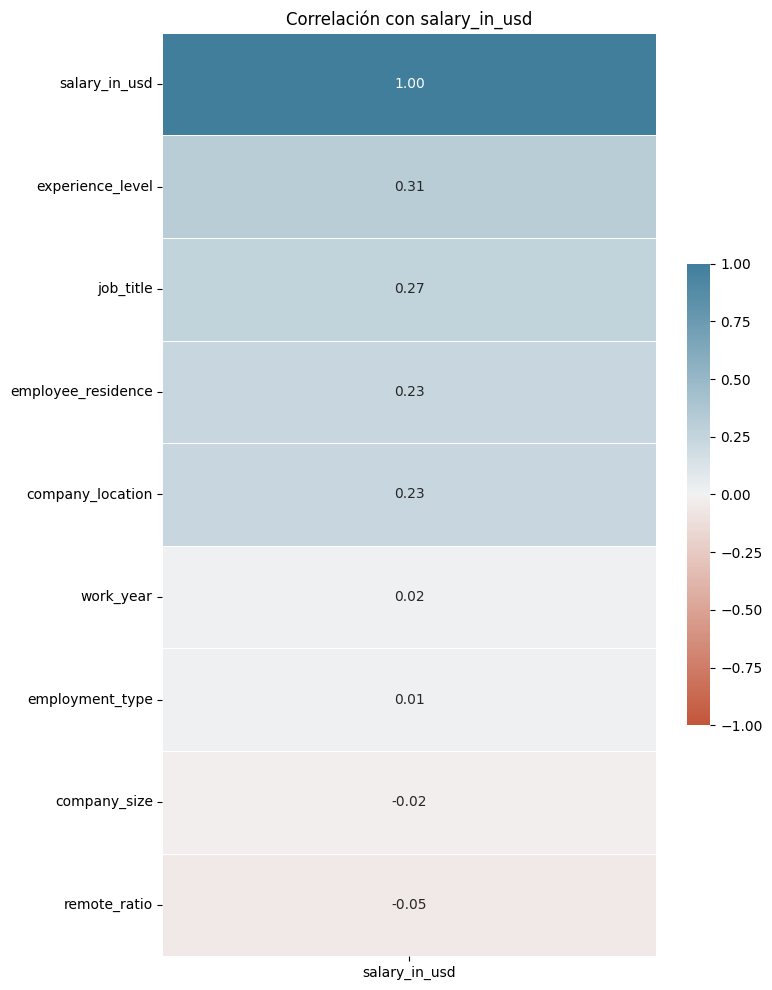

In [ ]:
corr_matrix = df_encoded.corr()
corr_target = corr_matrix[['salary_in_usd']].sort_values(by='salary_in_usd', ascending=False)

plt.figure(figsize=(8, 10))
sns.heatmap(
    data=corr_target,
    annot=True,
    fmt='.2f',
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={'shrink': 0.5},
)
plt.title('Correlación con salary_in_usd')
plt.tight_layout()
plt.show()